In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, GlobalMaxPool1D
from keras.optimizers import Adam
from keras.models import Model
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = [5, 2]

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.shape

(1259, 7)

In [5]:
series = df.close.values.reshape(-1, 1)
series.shape

(1259, 1)

In [6]:
scalar = StandardScaler().fit(series[:len(series) // 2])
scaled_series = scalar.transform(series).flatten()
scaled_series.shape

(1259,)

In [7]:
T = 10
D = 1
X = []
Y = []

for t in range(len(scaled_series) - T) :
    x = scaled_series[t: t+T]
    X.append(x)
    Y.append(scaled_series[t + T])

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1249, 10, 1) (1249,)


In [8]:
#LSTM model
i = Input(shape = (T, D))
x = LSTM(5) (i)
x = Dense(1) (x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
	loss = 'mse',
    optimizer = Adam(learning_rate=0.01)
)

r = model.fit(
    x=X,
    y=Y,
    validation_split=0.5,
    epochs = 100
)

Epoch 1/100
20/20 [==============================] - 2s 24ms/step - loss: 0.7836 - val_loss: 3.0891
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1512 - val_loss: 0.9518
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0591 - val_loss: 0.5977
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.2841
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.1642
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.1117
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0861
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0781
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0807
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0667
Epoch 11

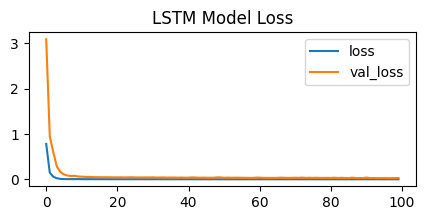

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Model Loss')
plt.legend()

In [11]:
#one step forecast
validation_targets = Y[N//2:]
validation_predictions = []

i = N//2

while(len(validation_predictions) < len(validation_targets)) :
    x = X[i].reshape(1, T, D)
    p = model.predict(x)[0][0]
    
    validation_predictions.append(p)
    
    i += 1

1/1 [==============================] - 0s 16ms/step


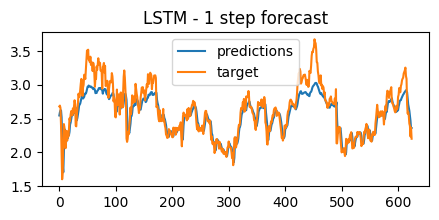

In [12]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_targets, label = 'target')
plt.title('LSTM - 1 step forecast')
plt.legend()

In [13]:
#multi step forecast
validation_targets = Y[N//2:]
validation_predictions = []

last_x = X[N//2]

while(len(validation_predictions) < len(validation_targets)) :
    x = last_x.reshape(1, T, D)
    p = model.predict(x)[0][0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, shift=-1)
    last_x[-1] = p

1/1 [==============================] - 0s 16ms/step


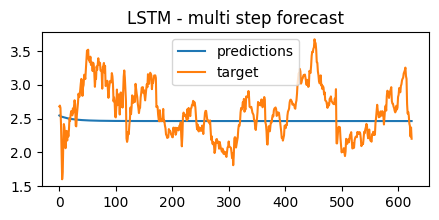

In [14]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_targets, label = 'target')
plt.title('LSTM - multi step forecast')
plt.legend()

In [15]:
df['previous_close'] = df.close.shift(periods = 1)
df

,date,open,high,low,close,volume,Name,previous_close
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915
...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690


In [16]:
df['return'] = (df['close'] - df['previous_close']) / df['previous_close']
df

,date,open,high,low,close,volume,Name,previous_close,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810,-0.014258
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000,-0.004107
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770,-0.019365
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690,0.016822


<AxesSubplot: >

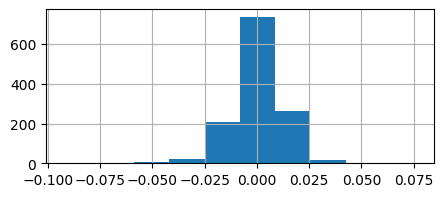

In [20]:
df['return'].hist()

In [21]:
series = df['return'].values[1:].reshape(-1, 1)
series.shape

(1258, 1)

In [22]:
scalar = StandardScaler()
scalar.fit(series[:len(series) // 2])
series = scalar.transform(series).flatten()

In [23]:
T = 10
D = 1
X = []
Y = []

for t in range(len(scaled_series) - T) :
    x = scaled_series[t: t+T]
    X.append(x)
    Y.append(scaled_series[t + T])

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1249, 10, 1) (1249,)


In [24]:
#LSTM model
i = Input(shape = (T, D))
x = LSTM(5) (i)
x = Dense(1) (x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
	loss = 'mse',
    optimizer = Adam(learning_rate=0.01)
)

r = model.fit(
    x=X,
    y=Y,
    validation_split=0.5,
    epochs = 80
)

Epoch 1/80
20/20 [==============================] - 2s 25ms/step - loss: 0.9227 - val_loss: 4.3430
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.2531 - val_loss: 2.1937
Epoch 3/80
20/20 [==============================] - 0s 6ms/step - loss: 0.1020 - val_loss: 1.0895
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0512 - val_loss: 0.5782
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0257 - val_loss: 0.3486
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0148 - val_loss: 0.2321
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.1678
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.1347
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.1135
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.1016
Epoch 11/80
20/20 

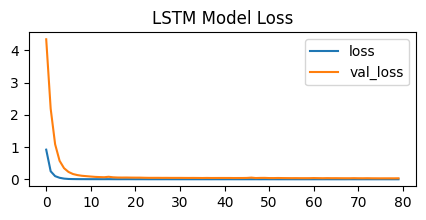

In [26]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Model Loss')
plt.legend()

In [27]:
#one step forecast
validation_targets = Y[N//2:]
validation_predictions = []

i = N//2

while(len(validation_predictions) < len(validation_targets)) :
    x = X[i].reshape(1, T, D)
    p = model.predict(x)[0][0]
    
    validation_predictions.append(p)
    
    i += 1

1/1 [==============================] - 0s 16ms/step


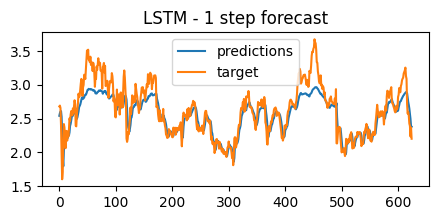

In [28]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_targets, label = 'target')
plt.title('LSTM - 1 step forecast')
plt.legend()

In [29]:
#multi step forecast
validation_targets = Y[N//2:]
validation_predictions = []

last_x = X[N//2]

while(len(validation_predictions) < len(validation_targets)) :
    x = last_x.reshape(1, T, D)
    p = model.predict(x)[0][0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, shift=-1)
    last_x[-1] = p

1/1 [==============================] - 0s 17ms/step


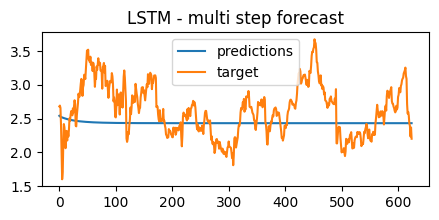

In [30]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_targets, label = 'target')
plt.title('LSTM - multi step forecast')
plt.legend()

In [37]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['return'].values

Ntrain = len(input_data) * 2//3
scalar = StandardScaler()
scalar.fit(input_data[:Ntrain])
input_data = scalar.transform(input_data)
input_data.mean()

0.33259898833744883

In [42]:
T = 10
D = input_data.shape[1]
X = []
Y = []

for t in range(len(input_data) - T) :
    x = input_data[t: t+T]
    X.append(x)
    Y.append((targets[t + T] > 0))

X = np.array(X)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1249, 10, 5) (1249,)


In [49]:
#LSTM model
i = Input(shape = (T, D))
x = LSTM(50, return_sequences = True) (i)
x = GlobalMaxPool1D() (x)
x = Dense(1, activation = 'sigmoid') (x)

model = Model(i, x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 5)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            11200     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
	loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

r = model.fit(
    x=X,
    y=Y,
    validation_split=0.33,
    epochs = 100
)

Epoch 1/100
27/27 [==============================] - 2s 19ms/step - loss: 0.6972 - accuracy: 0.5036 - val_loss: 0.6962 - val_accuracy: 0.4867
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5072 - val_loss: 0.6970 - val_accuracy: 0.4867
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5227 - val_loss: 0.6959 - val_accuracy: 0.4722
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5239 - val_loss: 0.6961 - val_accuracy: 0.4770
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5287 - val_loss: 0.6945 - val_accuracy: 0.4891
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5371 - val_loss: 0.6963 - val_accuracy: 0.4818
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5251 - val_loss: 0.6960 - val_accuracy: 0.5036
Epoch 8/100


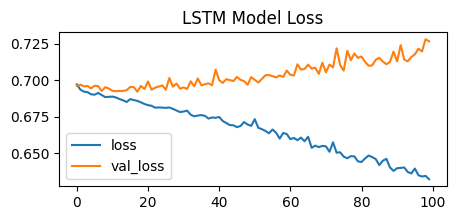

In [51]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Model Loss')
plt.legend()

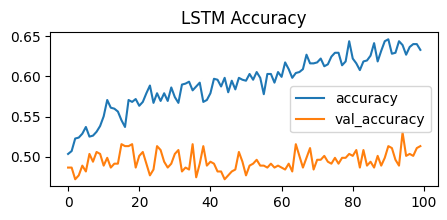

In [52]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM Accuracy')
plt.legend()